# R-curve for cohesive materials

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw


<img src="Development of Fracture Process Zone.png" width="800"/>

<img src="bilinear softening and damage.png" width="500"/>

In cohesive models, the inclusion of process zone at the tip of the crack is considered and normal constitutive law for tensile normal stress $\sigma$ and relative displacement $w$ is assumed. Process zone starts to dvelop when stress reaches the tensile strength $f_t$ of the material. The relation between $\sigma - w$ is given by a softening law where stress is a decreasing function of relative displacement w and area under the stress displacement curve gives the fracture energy $G_c$. The constitutive law is given as:
\begin{equation}
\sigma = (1 - \omega) K^{init} w
\end{equation}
The figure above shows two conditions i.e. a) the process zone is developing and b) the state of fully developed process zone.

In [2]:
K_init = sp.Symbol('K_init', nonnegative = True)
w = sp.Symbol(r'w', nonnegative = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
w_c = sp.Symbol(r'w_c', nonnegative = True)
omega = sp.Symbol('\omega', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
G_c_2 = sp.Symbol(r'\bar{G_c}', nonnegative = True)
nu = sp.Symbol(r'\nu', nonnegative = True)
f_t = sp.Symbol(r'f_t', nonnegative = True)

In [3]:
sigma_soft = (1 - omega) * K_init * w
sigma_soft

In order to obtain the R-curve for a cohesive material, following steps are followed:

1) Consider a softening constitutive law for the interface
    \begin{equation}
    \sigma = K^{init} w \,\,\mathrm{when}\,\, w \leq w_0 \\
    \sigma = K^{init} w_0 \frac{w_c - w}{w_c - w_0}\,\, \mathrm{when}\,\, w_0 < w_0 < w_c \\
    \sigma = 0 \,\,\mathrm{when} w_c \geq w
    \end{equation}

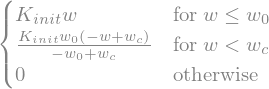

In [4]:
sigma = sp.Piecewise(
    (K_init * w, w <= w_0),
    (K_init * w_0 * ((w_c - w)/(w_c - w_0)), w < w_c),
    (0, True)
)
sigma

2) Assume relative displacement. Here, relative displacement is taken as the cubic function of $\xi$:
    \begin{equation}
        w(\xi,\zeta) = \frac{1}{L^3}\left[a(\zeta)\xi^3 + b(\zeta)\xi^2 + c(\zeta)\xi + d(\zeta)\right]
    \end{equation}
   The coefficients can be found by the boundaring conditions stated below:
   \begin{equation}
        w(\zeta - L,\zeta) = w_c \\
        w(\zeta ,\zeta) = w_0 \\ 
        \frac{\partial \hat{w}}{\xi} = 0
    \end{equation}
    where the derivative will be replaced by $\zeta - L, \zeta$ to give two more boundary conditions.

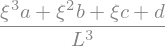

In [5]:
# Relative Displacement taken as cubic function
L = sp.Symbol('L', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
b = sp.Symbol('b', nonnegative = True)
c = sp.Symbol('c', nonnegative = True)
d = sp.Symbol('d', nonnegative = True)
xi = sp.Symbol(r'\xi', nonnegative = True)
hat_w = (1 / L**3) * (a * xi**3 + b * xi**2 + c * xi + d)
hat_w

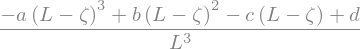

In [6]:
zeta = sp.Symbol(r'\zeta', nonnegative = True)
hat_w_c = hat_w.subs(xi,(zeta - L))
hat_w_c_sim = sp.simplify(hat_w_c)
hat_w_c_sim

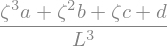

In [7]:
hat_w_0 = hat_w.subs(xi,zeta)
hat_w_0_sim = sp.simplify(hat_w_0)
hat_w_0_sim

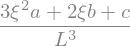

In [8]:
diff_hat_w = hat_w.diff(xi)
diff_hat_w

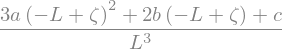

In [9]:
diff_hat_val_c = diff_hat_w.subs(xi, (zeta - L))
diff_hat_val_c

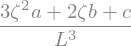

In [10]:
diff_hat_val_0 = diff_hat_w.subs(xi, zeta)
diff_hat_val_0

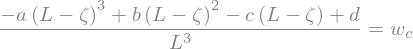

In [11]:
hat_w_c_eq = sp.Eq(hat_w_c_sim, w_c)
hat_w_c_eq

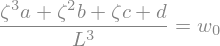

In [12]:
hat_w_0_eq = sp.Eq(hat_w_0_sim, w_0)
hat_w_0_eq

In [13]:
co_efficients = sp.solve([(sp.Eq(diff_hat_val_0, 0)), (sp.Eq(diff_hat_val_c, 0)), (sp.Eq(hat_w_0_sim, w_0)),(sp.Eq(hat_w_c_sim, w_c))]\
                         , (a,b,c,d))
co_efficients

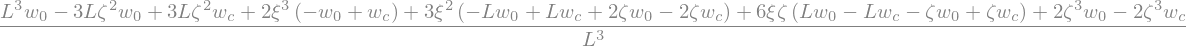

In [14]:
hat_w_sub = hat_w.subs(a,co_efficients[a]).subs(b,co_efficients[b]).subs(c,co_efficients[c]).subs(d,co_efficients[d])
hat_w_sim = sp.simplify(hat_w_sub)
hat_w_sim

3) Now obtain the damage distribution combining the constitutive relationship and the assigned relative displacement:

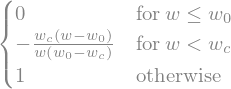

In [15]:
omega_val = sp.solve(sp.Eq(sigma_soft, sigma), omega)
omega_val[0]

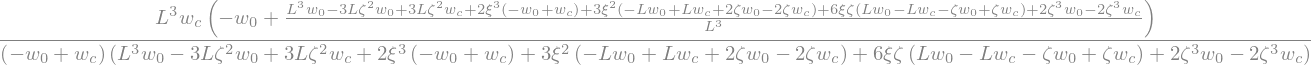

In [16]:
omega = (w_c * (hat_w_sim - w_0))/(hat_w_sim * (w_c - w_0))
    #d_val[0].subs(omega, hat_omega_sim)
#d_sim = sp.simplify(d_sub)
omega

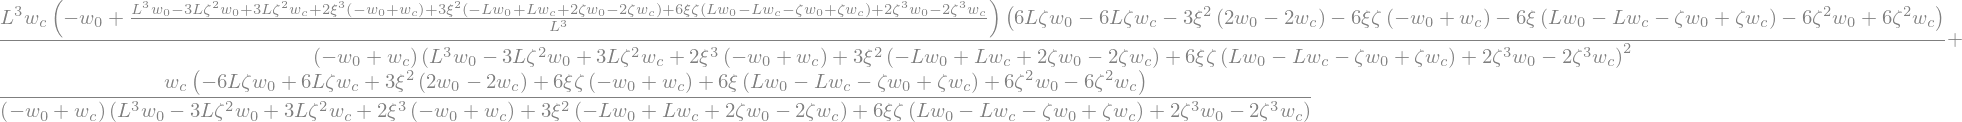

In [30]:
omega.diff(zeta)

4) Consider a set $L$ of $n_L$ possible fracture zone lengths such as:
    \begin{equation}
    L = L_1, L_2,...., L_i, ...., L_{n_L}
    \end{equation}
5) Assign $L = L_i$

In [31]:
L_val = np.linspace(200,600,3)

6) Determine R-curve as:
    \begin{equation}
    R = \frac{1}{2} K^{init} \int_{(\zeta - L)^+}^{\zeta} w^2 \frac{\partial D}{\partial \zeta} d \xi
    \end{equation}

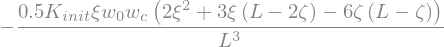

In [32]:
# R-curve
xi_ = zeta - L
R = ((1/2) * K_init * sp.integrate(hat_w_sim**2 * omega.diff(zeta), xi))#, (zeta - L, zeta))
#R_eq = R.subs(omega, hat_omega_sim)
R_sim = sp.simplify(R)
R_sim

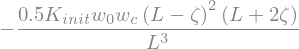

In [33]:
R_xi = R_sim.subs(xi, xi_)
R_curve = sp.simplify(R_xi)
R_curve

In [35]:
w_0 = sp.Symbol(r'w_0', nonnegative = True)
w_c = sp.Symbol(r'w_c', nonnegative = True)
get_R = sp.lambdify((K_init, w_0,w_c, L, zeta), R_curve, 'numpy')
get_R

<function _lambdifygenerated(K_init, w_0, w_c, L, Dummy_224)>

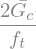

In [36]:
params = {E : 30000, #N/mm2
         G_c_2 : 0.025, #N/mm2
         K_init : 100000000, #N/mm3
         nu : 0.2, 
         f_t : 3 #N/mm2
         }
w_0 = f_t / K_init
w_c = 2 * G_c_2 / f_t
w_c

In [56]:
L_val = np.linspace(200,600,3)
R_xi_1 = np.zeros(10)
R_xi_2 = np.zeros(10)
R_xi_3 = np.zeros(10)
for i, L_ in enumerate(L_val):
    params = {E : 30000, #N/mm2
         G_c_2 : 0.025, #N/mm2
         K_init : 100000000, #N/mm3
         nu : 0.2, 
         f_t : 3 #N/mm2
         }
    w_0 = f_t.subs(params) / K_init.subs(params)
    w_c = 2 * G_c_2.subs(params) / f_t.subs(params)
    zeta_val = np.linspace(0, 600, 12)
    for j, z_ in enumerate(zeta_val): 
        if L_ == 200:
            zeta_1 = np.linspace(0, 500, 10)
            R_xi_1 = get_R(K_init.subs(params), w_0, w_c, L_, zeta_1)
        if L_ == 400:
            zeta_2 = np.linspace(200, 500, 10)
            R_xi_2 = get_R(K_init.subs(params), w_0, w_c, L_, zeta_2)
        if L_ == 600:
            zeta_3 = np.linspace(400, 500, 10)
            R_xi_3 = get_R(K_init.subs(params), w_0, w_c, L_, zeta_3)
    #R_xi_ = np.concatenate(R_xi_1, R_xi_2, R_xi_3)
print('R', R_xi_1)
print('R', R_xi_2)
print('R', R_xi_3)
print('zeta_val', zeta_val)

    

R [-0.0250000000000000 -0.0202846364883402 -0.0104252400548697
 -0.00185185185185185 -0.000994513031550069 -0.0142832647462277
 -0.0481481481481482 -0.109019204389575 -0.203326474622771
 -0.337500000000000]
R [-0.0125000000000000 -0.00940393518518518 -0.00648148148148148
 -0.00390625000000000 -0.00185185185185185 -0.000491898148148148 0
 -0.000549768518518520 -0.00231481481481482 -0.00546875000000000]
R [-0.00648148148148148 -0.00587308845196362 -0.00528374739623025
 -0.00471536351165981 -0.00416984199563075 -0.00364908804552152
 -0.00315500685871056 -0.00268950363257633 -0.00225448356449728
 -0.00185185185185185]
zeta_val [  0.          54.54545455 109.09090909 163.63636364 218.18181818
 272.72727273 327.27272727 381.81818182 436.36363636 490.90909091
 545.45454545 600.        ]


<IPython.core.display.Javascript object>


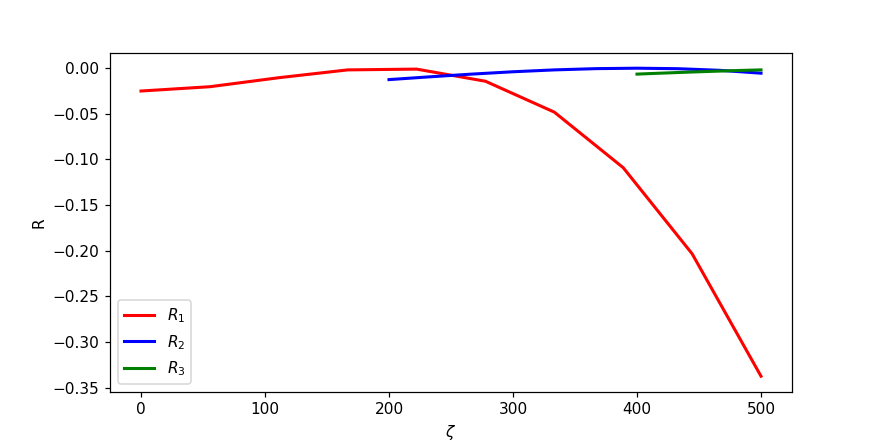

In [57]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(zeta_1, R_xi_1, color='red', lw=2, label = (r'$R_1$'))
ax1.plot(zeta_2, R_xi_2, color='blue', lw=2, label = (r'$R_2$'))
ax1.plot(zeta_3, R_xi_3, color='green', lw=2, label = (r'$R_3$'))
ax1.set_xlabel(r'$\zeta$'); ax1.set_ylabel('R')
ax1.legend()
#_.savefig("R_f_2.pdf", bbox_inches='tight')

In [ ]:
L_val = 200
R_xi_ = np.zeros((10,1))
zeta_val = np.linspace(0, 200, 10)
for j, zeta_ in enumerate(zeta_val):
                 params = {E : 30000, #N/mm2
                           G_c_2 : 0.025, #N/mm2
                           K_init : 100000000, #N/mm3
                           nu : 0.2, 
                           f_t : 3 #N/mm2
                        }
                 w_0 = f_t.subs(params) / K_init.subs(params)
                 w_c = 2 * G_c_2.subs(params) / f_t.subs(params)
                 R_xi_[j] = get_R(K_init.subs(params), w_0, w_c, L_, zeta_)
                 print(R_xi_[j])

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(zeta_val, R_xi_[:,0], color='red', lw=2, label = (r'$R_1$'))
ax1.set_xlabel(r'$\zeta$'); ax1.set_ylabel('R')
ax1.legend()
#_.savefig("R_f_2.pdf", bbox_inches='tight')

6) Evaluate the stiffness $K(\zeta)$ through finite element analysis for each value of the damage zone length $\zeta$.

7) Calculate the derivative $\frac{d K(\zeta)}{d \zeta}$ as finite difference $\frac{\Delta K(\zeta)}{\Delta \zeta}$.

8) Calculate displacement and Load as:
    \begin{equation}
    \eta (\zeta) = \sqrt{2 R(\zeta) \left(\frac{d K(\zeta)}{d \zeta}\right)^{-1}} \\
    P (\zeta) = K(\zeta) \eta(\zeta)
    \end{equation}

In [ ]:
f_2_val = np.linspace(1,4,3)
alpha_0 = 1
d_1 = np.zeros((10,3))
d_2 = np.zeros((10,3))
beta_2 = np.zeros((10,3))
psi = np.zeros((10,3))
alpha_ans = np.zeros((10,3))
COD = np.zeros((10,3))
R = np.zeros((10,3))
for i, f_2_ in enumerate(f_2_val):
    a_01 = np.linspace(10, 40, 10)
    for j, a in enumerate(a_01):
        if a == 10:
            R[j, i] = 0
        elif a > 10:
            alpha_ans = 1
        params = {
              K_Ic : 30, #N/mm(3/2),
              f_2 : 1.42, 
              E: 20000, #N/mm2
              B : 76.2, #mm
              S : 304.8, #mm
              P : 120, #N
              pi : 3.14, 
              a_0: 10, #mm
              f_1: 1.123}
        CMOD = (4 * sigma_x_ * f_2_) / E.subs(params)
        print(CMOD)
        alpha_ = (pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 \
            - a_0**2))**2) / (32 * a_0 * K_Ic**2 * f_2_**2) \
             + sp.sqrt((pi * E**2 * f_1**2 * (CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2))**2) \
                   / (32 * a_0 *  K_Ic**2 * f_2_**2) + 1)
        alpha_val = alpha_.subs(params) - alpha
        alpha_diff = alpha_val.diff(alpha)
        alpha_n = alpha_0 - (alpha_val/alpha_diff)
        alpha_sol = sp.solve(alpha_n, alpha)
        print('*************')
        print('a = ', j, a)
        print('f_2 =', i, f_2_)
        print('alpha_sol=', alpha_sol)
        if alpha_sol[0] > 1:
            alpha_ans = alpha_sol[0]
        elif alpha_sol[0] < 1:
            alpha_ans = alpha_sol[1]
        print('alpha =', alpha_ans)
        d_1 = (1/2) + ((alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                            - (( alpha_ans - 1) /  alpha_ans)**2)
        print('d_1 =', d_1)
        d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
        print('d_2 = ', d_2)
        beta_2 = (K_Ic.subs(params)**2 * ( alpha_ans * a_0.subs(params) - a_0.subs(params))**(-d_2)) / (E.subs(params) * (1 - (d_2 \
                                                        - (( alpha_ans-1)/ alpha_ans))\
                                                         /(d_1 - (( alpha_ans-1)/ alpha_ans))))
        psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans))\
            *  ((alpha_ans * a_0.subs(params) - a_0.subs(params))/(alpha_ans * a_0.subs(params) \
              - a_0.subs(params)))**(d_2 - d_1)
        print('beta =', beta_2)
        R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        if R[j, i] <= ((K_Ic.subs(params))**2 / E.subs(params)):
            R[j, i] = beta_2 * psi * (a - a_0.subs(params))**d_2
        else:
                R[j, i] = ((K_Ic.subs(params))**2 / E.subs(params))
        print('R =',[i, j], R[j, i])
        print('*************')
    print('R =',R)
    #i +=1 

In [ ]:
R.subs(params)

In [ ]:
R.subs(xi, zeta - L)

In [ ]:
R.subs(xi, zeta)

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(a_01, R[:,0], color='red', lw=2, label = (r'$f_2 = 1$'))
ax1.plot(a_01, R[:,1], color='blue', lw=2, label = (r'$f_2 = 2.5$'))
ax1.plot(a_01, R[:,2], color='green', lw=2, label = (r'$f_2 = 4$'))
#ax1.plot(a_0_val, R_c, color='orange', lw=2, label = (r'R_c'))
ax1.set_xlabel('a'); ax1.set_ylabel('R')
ax1.legend()
_.savefig("R_f_2.pdf", bbox_inches='tight')